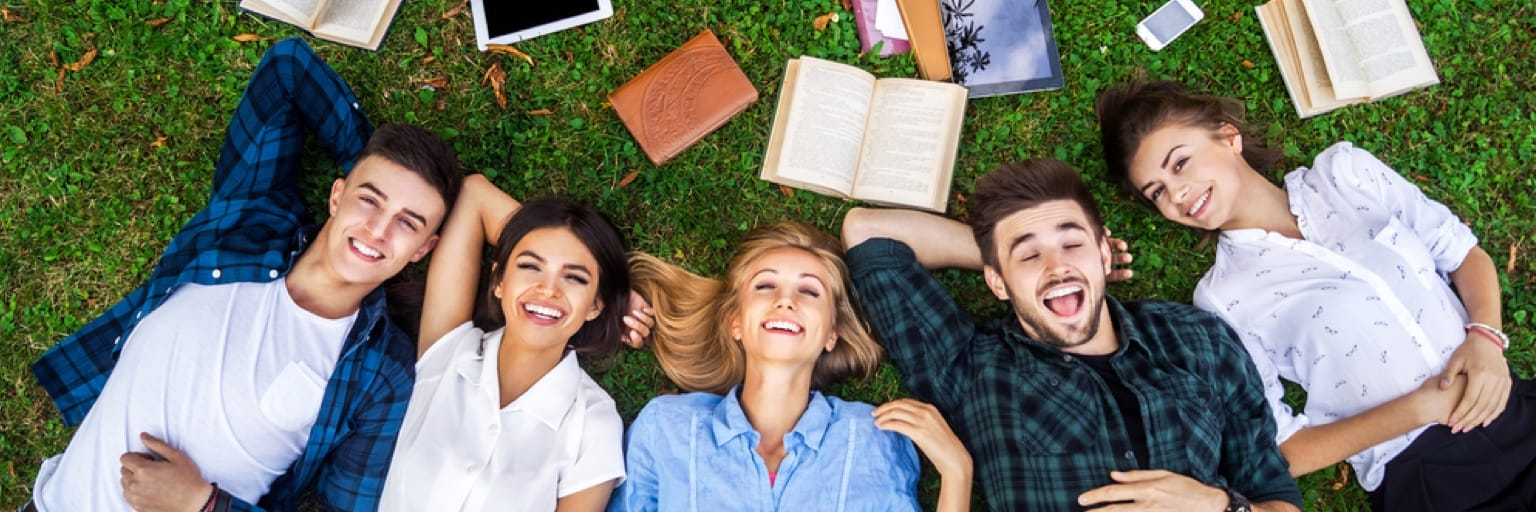

# **Dataset analysis on Student performance in exams**



In this notebook, we perform visualizations on a dataset and statistical analysis using ANOVA about the exam results of students in the United States.The Aim is to know which factors are playing a major role in the variation of student' score in exam.

## I - Importation and observations of dataset variables

In [ ]:
import  pandas as  pd 
import numpy as np

In [ ]:
df = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')
df.head(10)

In [ ]:
row = df.shape[0]
columns = df.shape[1]

print('The number of row in this dataset is {}.'.format(row))
print('The number of columns in this dataset is {}.'.format(columns))

In [ ]:
df.head()

In [ ]:
print(df.isna().sum())
print('we got 0 missing values in this dataset.')

In [ ]:
df.info()

In [ ]:
df.describe(include = 'all')

In this dataset: 
- <font color='green'>None missing values</font> has been observed. 
- <font color='green'>No duplicates values</font> has been observed.  


## II - Visualisation of independant variables



Take care about the fact we could get doublons, unfortunatly we can't know that because studen't id are anonyme and we assess each rows correspons to each students.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
education = df['parental level of education'].value_counts()
display(education)
display(education.index)

In [ ]:
plt.figure(figsize = (25,15))
plt.subplot(231)

plt.pie(education, labels=education.index,autopct='%1.1f%%', shadow=True, startangle=90, explode = (0.1, 0.1,0.1,0.1,0.1, 0.1),
    radius = 1.5, textprops={'fontsize': 14})
plt.legend(education.index[1:], bbox_to_anchor=(-0.5, 1.2))
plt.subplots_adjust(top=1.5, wspace = 1)
plt.title('Visualization of variable "parental level of education"', fontsize = 20, x = 0.5, y = 1.3)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.subplot(232)
sns.countplot(df['gender'])
plt.subplots_adjust(top=1.5)
plt.title('Visualization of variable "gender"', fontsize = 20)
plt.xticks(fontsize = 12)
plt.xlabel("gender", fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel("Count", fontsize = 15)

plt.subplot(233)
sns.countplot(df['race/ethnicity'])
plt.title('Visualization of variable "race/ethnicity"', fontsize = 20)
plt.xticks(fontsize = 12)
plt.xlabel("race/ethnicity", fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel("Count", fontsize = 15)

plt.subplot(234)
sns.countplot(df['lunch'])
plt.title('Visualization of variable "lunch"', fontsize = 20)
plt.xticks(fontsize = 12)
plt.xlabel("lunch", fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel("Count", fontsize = 15)

plt.subplot(235)
sns.countplot(df['test preparation course'])
plt.title('Visualization of variable "test preparation course"', fontsize = 20)
plt.xticks(fontsize = 12)
plt.xlabel("test preparation course", fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel("Count", fontsize = 15)

plt.show();

#### Another way to visualize data : With <font color='blue'>plotly.express</font> 


In [ ]:
import plotly.express as px
px.pie(df, names='parental level of education')

# Here is an example of visualization with plotly.express. This is an interactive schemas. 

## III - Visualisation of dependant variables





In [ ]:
print(df.columns)

### 1) Distribution of dependant variable
 




We have choosen to use plotly.graph_objects for observe distribution of differents dependants variables. We want to show different kind of graph like histogram, boxplot and violin plot which give differents ways to understand the distribution of quantitatives data of this dataset.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig1 = go.Figure()

fig1.add_trace(
    go.Histogram(
        x = df['math score'], marker_color='#EB89B5',
    opacity=0.90))
        
fig1.add_trace(
    go.Box(
        x = df['math score'],
        visible = False, marker_color='#EB89B5',
    opacity=0.90))

fig1.add_trace(
    go.Violin(
        x = df['math score'], marker_color='#EB89B5',
    opacity=0.90,
        visible = False))

fig1.update_layout(
        title = go.layout.Title(text = "Exploring math score", x = 0.5),
        showlegend = False)



fig1.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Histogram",
                        method = "update",
                        args = [{"visible" : [True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Box plot",
                            method = "update",
                            args = [{"visible" : [False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Violin plot",
                            method = "update",
                            args = [{"visible" : [False, False, True]}]) 
                ]
    )]
)
 

fig2 = go.Figure()

fig2.add_trace(
    go.Histogram(
        x = df['reading score']))

fig2.add_trace(
    go.Box(
        x = df['reading score'],
        visible = False))

fig2.add_trace(
    go.Violin(
        x = df['reading score'],
        visible = False))

fig2.update_layout(
        title = go.layout.Title(text = "Exploring reading score", x = 0.5),
        showlegend = False)

fig2.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Histogram",
                        method = "update",
                        args = [{"visible" : [True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Box plot",
                            method = "update",
                            args = [{"visible" : [False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Violin plot",
                            method = "update",
                            args = [{"visible" : [False, False, True]}]) 
                ]
    )]
)
 

fig3 = go.Figure()

fig3.add_trace(
    go.Histogram(
        x = df['writing score'], marker_color='#142d91',
    opacity=0.90))

fig3.add_trace(
    go.Box(
        x = df['writing score'],marker_color='#142d91',
    opacity=0.90,
        visible = False))

fig3.add_trace(
    go.Violin(
        x = df['writing score'],marker_color='#142d91',
    opacity=0.90,
        visible = False))

fig3.update_layout(
        title = go.layout.Title(text = "Exploring writing score", x = 0.5),
        showlegend = False)

fig3.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Histogram",
                        method = "update",
                        args = [{"visible" : [True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Box plot",
                            method = "update",
                            args = [{"visible" : [False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Violin plot",
                            method = "update",
                            args = [{"visible" : [False, False, True]}]) 
                ]
    )]
)



print(fig1.show())
print(fig2.show())
print(fig3.show())


### 2) Adding the columns '' Total_score ''



We are adding a total score column to see a global effect on total score then we could check each of them later if we find a significative effect.

In [ ]:
sum_columns = df['writing score'] + df['reading score'] + df['math score']
df['total_score'] = sum_columns
df.head()

In [ ]:
fig1 = go.Figure()

fig1.add_trace(
    go.Histogram(
        x = df['total_score'], marker_color='#f20000',
    opacity=0.90))
        
fig1.add_trace(
    go.Box(
        x = df['total_score'],
        visible = False, marker_color='#f20000',
    opacity=0.90))

fig1.add_trace(
    go.Violin(
        x = df['total_score'], marker_color='#f20000',
    opacity=0.90,
        visible = False))

fig1.update_layout(
        title = go.layout.Title(text = "Exploring total_score", x = 0.5),
        showlegend = False)



fig1.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Histogram",
                        method = "update",
                        args = [{"visible" : [True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Box plot",
                            method = "update",
                            args = [{"visible" : [False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Violin plot",
                            method = "update",
                            args = [{"visible" : [False, False, True]}]) 
                ]
    )]
)

<font color='green'>Conclusion about the quantitative distribution :</font> All dependant variables are quantitatives and  are following a normal law. 

## IV - Influence of independent variables on dependent variables



### 1) Influence with "test preparation course"

<font color='red'>Question : </font> Does preparation at tests have influence on score test ?

In [ ]:
plt.figure(figsize = (20,15))

plt.subplot(421)
sns.barplot(x = 'test preparation course', y = 'writing score', data = df)
plt.subplots_adjust(top=2)
plt.title('Visualization of variable "test preparation course" on writting score')

plt.subplot(422)
sns.barplot(x = 'test preparation course', y = 'reading score', data = df)
plt.title('Visualization of variable "test preparation course" on reading score')

plt.subplot(423)
sns.barplot(x = 'test preparation course', y = 'math score', data= df)
plt.title('Visualization of variable "test preparation course" on math score')

plt.subplot(424)
sns.barplot(x = 'test preparation course', y = 'total_score', data= df)
plt.title('Visualization of variable "test preparation course" on total_score')

plt.show()

<font color='green'>Conclusion : </font> With no statistical analysis, we can observe an increase in exam results among students who have completed exam preparation courses. 

### 2) Influence with "Lunch"

The variable "lunch" is a direct correlation to Income of parents. We want to know if the income of parents have an influence in exam results of students

In [ ]:
plt.figure(figsize = (20,15))

plt.subplot(421)
sns.barplot(x = 'lunch', y = 'writing score',palette="rocket", data = df)
plt.subplots_adjust(top=2)
plt.title('Visualization of variable "lunch" on writting score')

plt.subplot(422)
sns.barplot(x = 'lunch', y = 'reading score', palette="rocket",data = df)
plt.title('Visualization of variable "lunch" on reading score')

plt.subplot(423)
sns.barplot(x = 'lunch', y = 'math score',palette="rocket", data= df )
plt.title('Visualization of variable "lunch" on math score')

plt.subplot(424)
sns.barplot(x = 'lunch', y = 'total_score', palette="rocket", data= df)
plt.title('Visualization of variable "lunch" on total_score')

plt.show()

<font color='green'>Conclusion : </font> With no statistical analysis, we can observe an increase in exam results among students who have free/reduced lunch, that's mean we could get a significative influence of economic status like to this variable. 

### 3) Influence with gender

<font color='red'>Question : </font> Which gender did he or she do best on the test? ?

In [ ]:
plt.figure(figsize = (20,15))

plt.subplot(421)
sns.barplot(x = 'gender', y = 'writing score', palette= "Set1", data = df)
plt.subplots_adjust(top=2)
plt.title('Difference between female and male on writting score', fontsize = 15)

plt.subplot(422)
sns.barplot(x = 'gender', y = 'reading score', palette= "Set1" ,data = df)
plt.title('Difference between female and male on reading score', fontsize = 15)

plt.subplot(423)
sns.barplot(x = 'gender', y = 'math score', palette= "Set1", data= df )
plt.title('Difference between female and male on math score', fontsize = 15)

plt.subplot(424)
sns.barplot(x = 'gender', y = 'total_score', palette= "Set1", data= df)
plt.title('Difference between female and male on total_score', fontsize = 15)

plt.show();

<font color='green'>Conclusion : </font> In this visualisation, we can observe 2 main trend :
- First, girls still have a better score in reading and writing task than boys

- Secondly, it appear that the famous stereotype know as boys should be better in math than girls still be verified once in this observation

### 4) Influence with "parental level of education"

<font color='red'>Question : </font> Does the level of parental education have an impact on students' test results ?

In [ ]:
plt.figure(figsize = (25,15))

plt.subplot(221)
sns.barplot(x="parental level of education", y="writing score", data=df)
plt.title('Analysis of "parental level of education" with the writting score', fontsize = 15)
plt.subplots_adjust(top=2)


plt.subplot(222)
sns.barplot(x="parental level of education", y="reading score", data=df)
plt.title('Analysis of "parental level of education" with the reading score', fontsize = 15)
plt.ylim(1)

plt.subplot(223)
sns.barplot(x="parental level of education", y="math score", data=df)
plt.title('Analysis of "parental level of education" with math score', fontsize = 15)

plt.subplot(224)
sns.barplot(x="parental level of education", y="total_score", data=df)
plt.title('Analysis of "parental level of education" with total score', fontsize = 15)

plt.show()

<font color='green'>Conclusion : </font> With no statistical analysis, we can observe lower results among students who got their parent's level of education at high school

### 5) Influence with "race/ethnicity"

<font color='red'>Ethic question : </font> The influence of exam score on student ethnicity

In [ ]:
plt.figure(figsize = (15,10))

palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] 

plt.subplot(221)
sns.barplot(x="race/ethnicity", y="writing score", data=df, palette = palette)
plt.title('Analysis of different student race/ethnicity with the writting score', fontsize = 15)
plt.xticks(fontsize = 12)
plt.subplots_adjust(top=2)


plt.subplot(222)
sns.barplot(x="race/ethnicity", y="reading score", data=df, palette = palette)
plt.title('Analysis of different student race/ethnicity with the reading score', fontsize = 15)
plt.xticks(fontsize = 12)
plt.subplots_adjust(right = 1.5)
plt.ylim(1)

plt.subplot(223)
sns.barplot(x="race/ethnicity", y="math score", data=df, palette = palette)
plt.title('Analysis of different student race/ethnicity with math score', fontsize = 15)
plt.xticks(fontsize = 12)

plt.subplot(224)
sns.barplot(x="race/ethnicity", y="total_score", data=df, palette = palette)
plt.title('Analysis of different student race/ethnicity with Total score', fontsize = 15)
plt.xticks(fontsize = 12)
plt.subplots_adjust(right = 1.5)

plt.show()

<font color='green'>Conclusion : </font> With no statistical analysis, we can observe lower  results among student those tcorrespond to a ethnicity group A, B and C (with no more informations)

### 6) All variables effect with a Anova model 

<font color='blue'>Objective :  </font> We want to use statistics to determine which independent variable has the greatest impact on exam results.

In [ ]:
# we just rename columns because of necessary syntax for statistical analysis with statmodel package
df2 = df.rename({'parental level of education' :'parental_level_of_education','race/ethnicity':'ethnicity','writing score': 'writing_score', 'reading score': 'reading_score','math score':'math_score','test preparation course': 'test_preparation_course'}, axis=1)

In [ ]:
df2.head()

In [ ]:
#importing necessary lib to get a table of F and p_value (like in R) :
import statsmodels.api as sm
from statsmodels.formula.api import ols


#creating models of Anova on each score variables : 
model_total1 = ols('total_score ~ gender + ethnicity + parental_level_of_education+ lunch + test_preparation_course ', data=df2).fit()
model_total2 = ols('math_score ~ gender + ethnicity + parental_level_of_education+ lunch + test_preparation_course ', data=df2).fit()
model_total3 = ols('writing_score ~ gender + ethnicity + parental_level_of_education+ lunch + test_preparation_course ', data=df2).fit()
model_total4 = ols('reading_score ~ gender + ethnicity + parental_level_of_education+ lunch + test_preparation_course ', data=df2).fit()

anova_table1 = sm.stats.anova_lm(model_total1, typ=2)
anova_table2 = sm.stats.anova_lm(model_total2, typ=2)
anova_table3 = sm.stats.anova_lm(model_total3, typ=2)
anova_table4 = sm.stats.anova_lm(model_total4, typ=2)



print('----------------------------------------------------------------------')
print('Variables effect on writing score : ')
display(anova_table1)
print('\n')
print('----------------------------------------------------------------------')

print('Variables effect on reading score : ')
display(anova_table2)
print('\n')
print('----------------------------------------------------------------------')

print('Variables effect on math score : ')
display(anova_table3)
print('\n')
print('----------------------------------------------------------------------')

print('Variables effect on total score : ')
display(anova_table4)
print('\n')
print('----------------------------------------------------------------------')

In [ ]:
#creating a table with the Anova model on total_score : 
anova_table_total_score = anova_table1.sort_values(by='F',ascending=False)
anova_table_total_score


plt.figure(figsize = (12,6))
sns.barplot(x=anova_table_total_score['F'], y=anova_table_total_score.index, data=anova_table_total_score)
plt.xlabel('F-score', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Features', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title("Statistical influence of independant variable in Total score", fontsize = 15)
plt.show()

<font color='green'>Conclusion with Total score : </font> Anova analysis of the  effect on each independant variables on the total score show 2 mains things :
- Every variables have a significative effect on the variation of total score (p-value < 0.05).
- It appear via a table of F-score that 2 variables play a major role in the variation of score, "Lunch" and "preparation on test".

Now let's plot the f-score of each score variables that could indicate hidden variable as main effect on score (we think about gender as we seen previously on the visualisation of 'Influence with gender').

In [ ]:
plt.figure(figsize = (20,25))

plt.subplot(221)
sns.barplot(x=anova_table_for_writing['F'], y=anova_table_for_writing.index, data=anova_table_for_writing)
plt.xlabel('F-score', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Features', fontsize = 20)
plt.yticks(fontsize = 15)
plt.title("Statistical influence of independant variable in writing score", fontsize = 20)

plt.subplot(222)
sns.barplot(x=anova_table_for_math['F'], y=anova_table_for_math .index, data=anova_table_for_math)
plt.subplots_adjust(right = 1.8)
plt.xlabel('F-score', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Features', fontsize = 20)
plt.yticks(fontsize = 15)
plt.title("Statistical influence of independant variable in Math score", fontsize = 20)

plt.subplot(223)
sns.barplot(x=anova_table_for_reading['F'], y=anova_table_for_reading.index, data=anova_table_for_reading)
plt.xlabel('F-score', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Features', fontsize = 20)
plt.yticks(fontsize = 15)
plt.title("Statistical influence of independant variable in reading score", fontsize = 20)

plt.show()

<font color='green'>Conclusion about Anova analysis : </font>Anova analysis of the  effect on each independant variables each score 

- writting and math score are mainly due to 3 variables, gender, test preparation course and kind of lunch, thus, these analysis show that gendervariable play a additional major role in the variation in math, on which student male are better, and on writting score, on which female students are better 

- interesting analysis on reading score show that the kind of lunch play a major role in the variation of reading score

## V - Conclusion

**Observation** and **Anova analysis** on our dataset show interesting results : 

- First, <font color='red'>Preparing for a test </font> is Obviously related to <font color='blue'>increased test scores </font>.

- Secondly, Student who get <font color='red'>standard lunch</font> have globally a <font color='blue'>better score</font>, compared to students who have a free/reduced lunch, indicate a <font color='blue'>direct correlation on the economic status</font> of these student and their parents. Thus, we could extrapolate and assess that student with a better economic situation have better score than others, it confirms many sociologicals articles that show this effect.

- Third, <font color='red'>female students</font> have better score in <font color='red'>literary subjects</font> (Writing and reading) than male students. But <font color='blue'>male students</font> have better score in <font color='blue'>science subjects</font> (Math). 

- Finally, this dataset is <font color='red'>specific to one school</font> in the United States. Additional studies are needed, such as studies in other countries and other schools, to confirm our results. It would be interesting to compare these results <font color='blue'>for each university in different countries</font>. 